In [2]:
import numpy as np
import matplotlib.pyplot as plt

Stochastic DE

$$ \theta = \omega + \sqrt{2D_r}ξ_θ  $$
$$ \dot{x} = v \cos(\theta) + \sqrt{2D_t}ξ_x $$
$$ \dot{y} = v \sin(\theta) + \sqrt{2D_t}ξ_y $$

1. Consider the parameter values $Dt = 0.2 µm^2/s, Dr = 0.17rad^2/s, v = 30m/s, ω = 10rad/s$. Using
Euler’s numerical simulation scheme, plot five stochastic trajectories of duration 10s, using a simulation time
step ∆t = 0.01s.

In [3]:
#paramaters
pars = {}
pars['Dr'] = 0.17
pars['Dt'] = 0.2
pars['omega'] = 10
pars['v'] = 30
pars['delta_t'] = 0.01
pars['n_realizations'] = 5 

Euler Scheme

$$ X_{t+\Delta t} = X_t + f(X_t, t)\Delta t + g(X_t,t)\Delta B_t $$

where $$ \Delta B_t = \mathcal{N}(0, \sqrt\Delta t) $$

In [4]:
def euler_one_traj(n_time, pars):   
    #initial condition
    theta = 0
    x = 0
    y = 0
    theta_traj = []
    x_traj = []
    y_traj = []
    
    #performing 1 traj with n_time number of data points
    for i in range(n_time):
        #generate delta_B
        s1 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        s2 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        s3 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        #solve for theta, x, y
        theta = theta + pars['omega']*pars['delta_t'] + np.sqrt(2*pars['Dr'])*s1
        x = x + pars['v']*np.cos(theta)*pars['delta_t'] + np.sqrt(2*pars['Dt'])*s2
        y = y + pars['v']*np.sin(theta)*pars['delta_t'] + np.sqrt(2*pars['Dt'])*s3
        
        theta_traj.append(theta)
        x_traj.append(x)
        y_traj.append(y)
    return theta_traj, x_traj, y_traj

In [5]:
def euler_n_traj(max_time, pars):
    min_time = 0
    n_time = int((max_time - min_time)/pars['delta_t'] + 1) #n_time = num of evenly spaced samples (ex. 1001 points)
    time = np.linspace(min_time, max_time, n_time) #time(ex. 0 (min time), 0.01, 0.02, ..., 10 (max time)) with n_time no. of data points
    
    theta_traj_list = []
    x_traj_list = []
    y_traj_list = []
    for i in range(pars['n_realizations']):
        theta_traj, x_traj, y_traj = euler_one_traj(n_time, pars)
        theta_traj_list.append(theta_traj)
        x_traj_list.append(x_traj)
        y_traj_list.append(y_traj)
        
    return theta_traj_list, x_traj_list, y_traj_list, time

In [6]:
#for t = 10s
theta_traj_list, x_traj_list, y_traj_list, time = euler_n_traj(10, pars)

Plotting

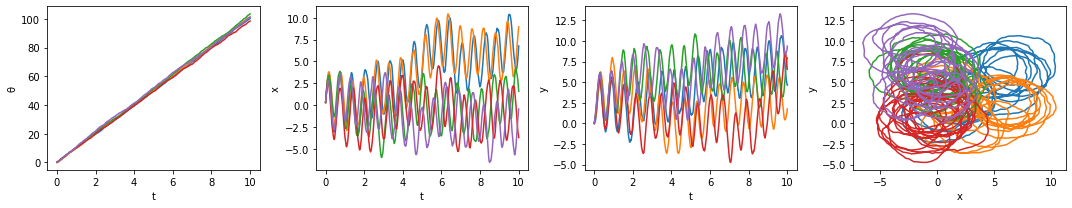

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))
for theta in theta_traj_list:
    ax[0].plot(time, theta)
for x in x_traj_list:
    ax[1].plot(time, x)
for y in y_traj_list:
    ax[2].plot(time, y)
for x,y in zip(x_traj_list, y_traj_list):
    ax[3].plot(x,y)
    
ax[0].set_xlabel('t')
ax[0].set_ylabel('θ')

ax[1].set_xlabel('t')
ax[1].set_ylabel('x')

ax[2].set_xlabel('t')
ax[2].set_ylabel('y')

ax[3].set_xlabel('x')
ax[3].set_ylabel('y')

plt.tight_layout()
plt.show()

2. Compare the theoretical result of P(θ,t) with the probability density of θ obtained from 10^3 simulations using the parameter values in (1) for observation times t = 1, 5, and 10 s.

The probability density distribution follows a Gaussian distribution with

$ \mu = \omega t$

$ \sigma = \sqrt {2D_r t} $

In [8]:
def analytical_soln(times, start, end, pars):
    prob_list = []
    theta = np.linspace(start, end, 100)
    mean = pars['omega']*times
    for th in theta:
        exponent = np.exp(-((th-mean)**2) / (4*pars['Dr']*times)) 
        prob = exponent/ np.sqrt(4*np.pi*pars['Dr']*times)
        prob_list.append(prob)
    return prob_list, theta

In [9]:
pars['n_realizations'] = 1000
pars['omega'] = 0

In [10]:
#for t = 1s
analytical_1s, theta_1s = analytical_soln(1, -2, 2, pars)
theta_traj_list, x_traj_list, y_traj_list, time = euler_n_traj(1, pars)

In [11]:
#obtain the last element of theta_traj_list
numerical_1s = []
for traj in theta_traj_list:
    last_element = traj[-1]
    numerical_1s.append(last_element)

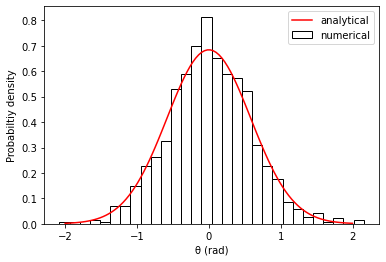

In [12]:
plt.hist(numerical_1s, density = True, edgecolor = 'black', color = 'white', bins = 30, label = 'numerical')
plt.plot(theta_1s, analytical_1s, color = 'red', label = 'analytical')

plt.xlabel('θ (rad)')
plt.ylabel('Probabiltiy density')
plt.legend()
plt.show()

In [14]:
x = [1,2,3,4]
y = [5,6,7,8]

In [15]:
for i,j in zip(x,y):
    print(i,j)

1 5
2 6
3 7
4 8
